In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from skimage import transform

In [2]:
def prepare_data(train_data, train_label, memory_unit, batch_size):
    number, height, width, channel = \
    train_data.shape[0], train_data.shape[1], train_data.shape[2], train_data.shape[3]

    number_of_mem_unit = number // memory_unit

    # let the data become from (1200, 80, 160, 1) to (40, 30, 80 * 160)
    sample_number = number_of_mem_unit * memory_unit
    unit_train_data = train_data[0:sample_number,:,:,:].reshape(-1, batch_size, memory_unit, height * width)
    
    # label shift to right by one step
    unit_train_label = train_label[0:sample_number,:,:,:].reshape(-1, batch_size, memory_unit, height * width)
    
    return iter(unit_train_data), iter(unit_train_label)


In [3]:
# Example of formatting
#labels = np.array(pickle.load(open("road_labels.p", "rb" )))
#print(len(labels))
#print(labels.shape)
#print(labels.reshape(-1, 4, 63, 40 * 80).shape)

In [4]:
datalist = pickle.load(open("CNN_road_labels.p", "rb" ))[0:52850]
data = np.array([transform.resize(i, (40, 80)) for i in np.clip(np.array(datalist), 0, 1)])
labellist = pickle.load(open("road_labels.p", "rb" ))[0:52850]
label = np.array([transform.resize(i, (40, 80)) for i in labellist])

# label = label / 255

print(np.max(data))
print(np.max(label))

train_ratio = 0.8
memory_size = 3
batch_size = 17
train_data, test_data, train_label, test_label = \
train_test_split(data, label, train_size = train_ratio,
                              test_size = 1 - train_ratio,
                              shuffle = False)

input_data_iter, input_label_iter = prepare_data(train_data, train_label, memory_size, batch_size)

/home/spencer/Documents/MachineLearning/project_venv/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


0.930234432220459
0.8411764705882356


In [5]:
#Cell used to training

learning_rate = 0.001

#Size of our input image. e.g. number of features
number_of_features = 40 * 80

steps_num = 10000

#input data
X = tf.placeholder(tf.float32, [None, memory_size, number_of_features])
#data label
Y = tf.placeholder(tf.float32, [None, memory_size, number_of_features])

#RNN cells
cell = tf.contrib.rnn.DropoutWrapper(tf.contrib.rnn.BasicRNNCell(number_of_features, activation=tf.sigmoid), input_keep_prob=0.7, output_keep_prob=1, state_keep_prob=1)

outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

#loss
loss = tf.losses.mean_squared_error(outputs, Y)

optimizer = tf.train.AdamOptimizer()

train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    for iteration in range(steps_num):
        try:
            train_data, train_labels = next(input_data_iter), next(input_label_iter)
        except StopIteration:
            print('Stopping iteration - no more input data')
            break
        sess.run(train, feed_dict = {X:train_data, Y:train_labels})
        error = loss.eval( feed_dict = {X:train_data, Y:train_labels})
        print("iteration {}, error is {}".format(iteration, error))
        print("\n")
    saver.save(sess, save_path="./tmp/rnn_model_RNN_SIGMOID/rnn_model")

iteration 0, error is 0.10624900460243225


iteration 1, error is 0.07687506824731827


iteration 2, error is 0.06724279373884201


iteration 3, error is 0.05738676339387894


iteration 4, error is 0.07496723532676697


iteration 5, error is 0.06891410797834396


iteration 6, error is 0.02925853431224823


iteration 7, error is 0.029674990102648735


iteration 8, error is 0.02485569752752781


iteration 9, error is 0.030929837375879288


iteration 10, error is 0.027418123558163643


iteration 11, error is 0.039111219346523285


iteration 12, error is 0.018736939877271652


iteration 13, error is 0.030088618397712708


iteration 14, error is 0.020758409053087234


iteration 15, error is 0.02072383277118206


iteration 16, error is 0.06608336418867111


iteration 17, error is 0.08011577278375626


iteration 18, error is 0.055515676736831665


iteration 19, error is 0.03122377023100853


iteration 20, error is 0.03880714997649193


iteration 21, error is 0.0229698084294796


iteration 22,

iteration 180, error is 0.007024581078439951


iteration 181, error is 0.017568396404385567


iteration 182, error is 0.012397573329508305


iteration 183, error is 0.009078221395611763


iteration 184, error is 0.007583179976791143


iteration 185, error is 0.006018804386258125


iteration 186, error is 0.005999406334012747


iteration 187, error is 0.005528711713850498


iteration 188, error is 0.013369007036089897


iteration 189, error is 0.01772712916135788


iteration 190, error is 0.016598179936408997


iteration 191, error is 0.015505942516028881


iteration 192, error is 0.01364333089441061


iteration 193, error is 0.021521994844079018


iteration 194, error is 0.014102768152952194


iteration 195, error is 0.012605847790837288


iteration 196, error is 0.011588351801037788


iteration 197, error is 0.055207736790180206


iteration 198, error is 0.029156936332583427


iteration 199, error is 0.013369589112699032


iteration 200, error is 0.012095262296497822


iteration 201, 

iteration 355, error is 0.0026259119622409344


iteration 356, error is 0.0024115536361932755


iteration 357, error is 0.0020450714509934187


iteration 358, error is 0.0018160012550652027


iteration 359, error is 0.0033364214468747377


iteration 360, error is 0.0026980654802173376


iteration 361, error is 0.002557266503572464


iteration 362, error is 0.0022164187394082546


iteration 363, error is 0.002013546647503972


iteration 364, error is 0.001991396304219961


iteration 365, error is 0.012548094615340233


iteration 366, error is 0.02359507791697979


iteration 367, error is 0.02781672216951847


iteration 368, error is 0.01705307886004448


iteration 369, error is 0.009701547212898731


iteration 370, error is 0.00514265475794673


iteration 371, error is 0.005940264090895653


iteration 372, error is 0.003316281596198678


iteration 373, error is 0.004491612780839205


iteration 374, error is 0.004274808801710606


iteration 375, error is 0.004068498965352774


iteration 

iteration 534, error is 0.009343817830085754


iteration 535, error is 0.010874216444790363


iteration 536, error is 0.007011845242232084


iteration 537, error is 0.007091629784554243


iteration 538, error is 0.013121921569108963


iteration 539, error is 0.013648641295731068


iteration 540, error is 0.015660736709833145


iteration 541, error is 0.013588733971118927


iteration 542, error is 0.002404746599495411


iteration 543, error is 0.01658955216407776


iteration 544, error is 0.016823366284370422


iteration 545, error is 0.020295538008213043


iteration 546, error is 0.017449969425797462


iteration 547, error is 0.01216178573668003


iteration 548, error is 0.012678788043558598


iteration 549, error is 0.03431859239935875


iteration 550, error is 0.01614546589553356


iteration 551, error is 0.01799694076180458


iteration 552, error is 0.020288337022066116


iteration 553, error is 0.008455460891127586


iteration 554, error is 0.018888549879193306


iteration 555, err

iteration 710, error is 0.014811494387686253


iteration 711, error is 0.021702375262975693


iteration 712, error is 0.01525106094777584


iteration 713, error is 0.010489271953701973


iteration 714, error is 0.013384521938860416


iteration 715, error is 0.011139350943267345


iteration 716, error is 0.008056677877902985


iteration 717, error is 0.012529213912785053


iteration 718, error is 0.010746768675744534


iteration 719, error is 0.00834980234503746


iteration 720, error is 0.009885474108159542


iteration 721, error is 0.012766096740961075


iteration 722, error is 0.016692055389285088


iteration 723, error is 0.027948124334216118


iteration 724, error is 0.018812399357557297


iteration 725, error is 0.004611284006386995


iteration 726, error is 0.004535591695457697


iteration 727, error is 0.006396890617907047


iteration 728, error is 0.013928426429629326


iteration 729, error is 0.014256566762924194


iteration 730, error is 0.0037665781565010548


iteration 731,

/home/spencer/Documents/MachineLearning/project_venv/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


75
INFO:tensorflow:Restoring parameters from ./tmp/rnn_model_RNN_SIGMOID/rnn_model
[1.93212047e-01 1.16566895e-01 3.71372792e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.53943457e-02 6.13075811e-02 7.38199633e-02 6.23157695e-02
 2.60118162e-02 1.19286706e-04 0.00000000e+00 0.00000000e+00]
[0.332826   0.34917971 0.34764782 0.33655638 0.3094935  0.33386293
 0.30703005 0.28144297 0.2683692  0.23462853 0.23298761 0.20371754
 0.14964116 0.17801803 0.1332026  0.10041757 0.08154568 0.06559247
 0.06953181 0.06949193]


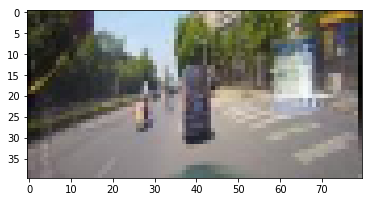

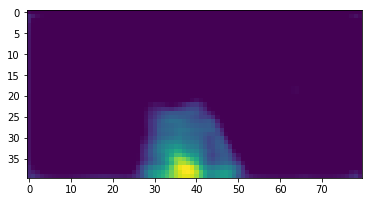

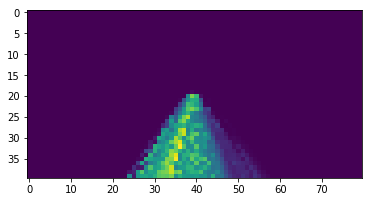

In [16]:
import matplotlib.image as mpimg

original_images_raw = pickle.load(open("bridge.p", "rb"))[0:52850]
O = np.array([transform.resize(i, (40, 80)) for i in original_images_raw])

predict_images_raw = pickle.load(open("bridge_CNN_labels.p", "rb" ))[0:75]
print(len(predict_images_raw))
I = np.array([transform.resize(i, (40, 80)) for i in predict_images_raw]).reshape(-1, 3, 3200)


memory_size = 3
batch_size = 17

#Size of our input image. e.g. number of features
number_of_features = 40 * 80

steps_num = 1000

tf.reset_default_graph()

#input data
X = tf.placeholder(tf.float32, [None, memory_size, number_of_features])
#data label
Y = tf.placeholder(tf.float32, [None, memory_size, number_of_features])

#RNN cells
cell = tf.contrib.rnn.DropoutWrapper(tf.contrib.rnn.BasicRNNCell(number_of_features, activation=tf.sigmoid), input_keep_prob=0.7, output_keep_prob=1, state_keep_prob=1)

outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

#loss
loss = tf.losses.mean_squared_error(outputs, Y)

optimizer = tf.train.AdamOptimizer()

train = optimizer.minimize(loss)
saver = tf.train.Saver()

# Cell used to predicting
with tf.Session() as sess:
    saver.restore(sess, "./tmp/rnn_model_RNN_SIGMOID/rnn_model")
    # input data used to predict, format:
    x_input = I
    print(x_input[0][0][3000:3020])
    # The output should be a 1-D array whose size is height * width. 
    # In order to display it, it needs reshpe
    y_pred = sess.run(outputs, feed_dict={X:x_input})
    print(y_pred[0][0][3000:3020])
    
    n = 55

    plt.figure()
    plt.imshow(O[n])
    
    I = I.reshape(-1, 40, 80)

    plt.figure()
    plt.imshow(I[n])
    
    P = y_pred.reshape(-1, 40, 80)
    pickle.dump(P,open('bridge_RNN_Sigmoid_labels.p', "wb" ))

    plt.figure()
    plt.imshow(P[n])